# **Question 1**

**Section A**

We assume that $WL(\cdot,\cdot)$ is a weak learner with some $\gamma \in (0, \frac12)$. Formally: Given training set $S$, for any possible distribution $D$ of weights of each given point in the train set, we assume that the $WL$'s loss satisfies:

$L_D(S) \le \frac12 - \gamma$

In simpler terms, since a loss of $\frac12$ is possible with a random dummy model, then we only use models that are significantly better than that for some constant $\gamma \in (0, \frac12)$ for any distribution of weighting of the data.

Initially, we give every point in the train set an equal weight in the distribution.

Each step in the iteration performs the following:

1.   Invoke a Weak Learner on the current train set and distribution, noted by $h_t$.
2.   Calculate the weak learner's weighted loss. We store it in a variable $\varepsilon_t$.
3.   Calculate an updated weighting that has an inverted correlation with $\varepsilon_t$, meaning that as the loss grows smaller, the weight grows larger. We store it in a variable $w_t$.
4.   Update the distribution, giving more weight to wrongly labeled points and less weight to correct ones while maintaining a sum of $1$.

We perform this loop a constant $T$ times. Finally, the output is aggregated as the sign of the sum of $w_th_t(x)$, both being defined in the loop.

**Section B**

Denote $I = \{i| 1 \le i \le m, y_i \ne h_t(x_i) \}, \bar I = \{i| 1 \le i \le m, y_i = h_t(x_i)\}$. It then holds that:

$\forall i \in I: y_i = -h_t(x_i) \Rightarrow -y_ih_t(x_i) = 1$

$\forall i \in \bar I: y_i = h_t(x_i) \Rightarrow y_ih_t(x_i) = 1$

We further note that

$\varepsilon_t = \sum_{i=1}^m D_i^{(t)}1_{[y_i \ne h_t(x_i)]} = \sum_{i \in I} D_i^{(t)}$

And

$1 - \varepsilon_t = \sum_{i=1}^m D_i^{(t)}1_{[y_i \ne h_t(x_i)]} = \sum_{i \in \bar I} D_i^{(t)}$

Giving:

$\varepsilon_t \cdot e^{w_t} + (1-\varepsilon_t)e^{-w_t} =
\sum_{i \in I} D_i^{(t)} e^{w_t} + \sum_{i \in \bar I} D_i^{(t)} e^{-w_t} =
\sum_{i \in I} D_i^{(t)} e^{-w_ty_ih_t(x_i)} + \sum_{i \in \bar I} D_i^{(t)} e^{-w_ty_ih_t(x_i)}$

Which gives:

$\varepsilon_t \cdot e^{w_t} + (1-\varepsilon_t)e^{-w_t} = \sum_{i=1}^m D_i^{(t)} e^{-w_ty_ih_t(x_i)}$

This is the left side of the required equation. Now we'll show the right side:


$\varepsilon_t \cdot e^{w_t} + (1-\varepsilon_t)e^{-w_t} =
\varepsilon_t \cdot e^{\frac12\log(\frac1{\varepsilon_t}-1)} + (1-\varepsilon_t)e^{-\frac12\log(\frac1{\varepsilon_t}-1)} =
\varepsilon_t\sqrt{\frac1{\varepsilon_t}-1}+(1-\varepsilon_t)\frac1{\sqrt{\frac1{\varepsilon_t}-1}}$

Which gives:

$\sqrt{\varepsilon_t(1-\varepsilon_t)} +(1-\varepsilon_t)\sqrt{\frac{\varepsilon_t}{1-\varepsilon_t}} = \sqrt{\varepsilon_t(1-\varepsilon_t)} + \sqrt{\varepsilon_t(1-\varepsilon_t)} = 2\sqrt{\varepsilon_t(1-\varepsilon_t)}$

As required.

**Section C**

Part 1:

Let $i \in [m]$. If $y_i = \hat h(x_i)$, then $1_{[y_i \ne \hat h(x_i)]} = 0 ≤ e^x$ for any $x \in \mathbb R$, and specifically for $x = -y_if_T(x_i)$.

Otherwise, $y_i \ne \hat h(x_i)$. In this case,

$y_i = -\text{sign}(f_T(x_i)) \Rightarrow -y_if_T(x_i) > 0 \Rightarrow e^{-y_if_T(x_i)} > e^0 = 1$

Where the inequality holds from the monotonicity of $e^x$, giving the required inequality:

$1_{[y_i \ne \hat h(x_i)]} ≤e^{-y_if_T(x_i)}$

For any $i \in [m]$.

It immediately follows by definition that

$L_s(\hat h) = \frac1m\sum_{i=1}^m1_{[y_i \ne \hat h(x_i)]} \le
\frac1m\sum_{i=1}^me^{-y_if_T(x_i)} = z_t$

Part 2:

We'll prove, using induction, that for any $t \in \mathbb N, i \in [m]$,

$D_i^{(t)} = \frac{e^{-y_if_{t-1}(x_i)}}{\sum_{j=1}^me^{-y_jf_{t-1}(x_j)}} = \frac1{Z^{(t)}}e^{-y_if_{t-1}(x_i)}$

Which leads to $D_i^{(t)} \propto e^{-y_if_{t-1}(x_i)}$, where we also know the constant (needed for Part 3).


Induction Base: $t = 1$.

$D_i^{(1)} = \frac1m, e^{-y_if_0(x_i)} = e^{-y_i \cdot 0} = 1$

And so we get:

$D_i^{(1)} = \frac1m = \frac{y^{-y_i\cdot 0}}{\sum_{j=1}^me^{-y_j \cdot 0}} = \frac{e^{-y_i \cdot f_0(x_i)}}{\sum_{j=1}^me^{-y_jf_0(x_j)}}$

Induction Hypothesis: $D_i^{(t)} = \frac{e^{-y_if_{t-1}(x_i)}}{\sum_{j=1}^me^{-y_jf_{t-1}(x_j)}}$.

Induction Step: Prove for $t+1$.

By the update rule, the following holds:

$D_i^{(t+1)} = \frac{D_i^{(t)}e^{-w_ty_ih_t(x_i)}}{\sum_{j=1}^mD_j^{(t)}e^{-w_ty_jh_t(x_j)}} \overset{Ind.Hyp}{=} \frac{e^{-y_if_{t-1}(x_i)}e^{-w_ty_ih_t(x_i)}}{\sum_{k=1}^me^{-y_kf_{t-1}(x_k)} \cdot \sum_{j=1}^m\frac{e^{-y_jf_{t-1}(x_j)}}{\sum_{k=1}^me^{-y_kf_{t-1}(x_k)}}e^{-w_ty_jh_t(x_j)}}$

Continuing:

$\frac{e^{-y_if_{t-1}(x_i)}e^{-w_ty_ih_t(x_i)}}{\sum_{j=1}^me^{-y_jf_{t-1}(x_j)}e^{-w_ty_jh_t(x_j)}} =
\frac{e^{-y_i\sum_{p=1}^{t-1}w_ph_p(x_i)}e^{-w_ty_ih_t(x_i)}}{\sum_{j=1}^me^{-y_j\sum_{p=1}^{t-1}w_ph_p(x_j)}e^{-w_ty_jh_t(x_j)}} =
\frac{e^{-y_i\sum_{p=1}^{t}w_ph_p(x_i)}}{\sum_{j=1}^me^{-y_j\sum_{p=1}^{t}w_ph_p(x_j)}}$

Which gives the required:

$D_i^{(t+1)} = \frac{e^{-y_if_t(x_i)}}{\sum_{j=1}^me^{-y_jf_t(x_j)}}$

Therefore the induction holds, and we have shown both facts: First, $D_i^{(t)} \propto e^{-y_if_{t-1}(x_i)}$, and also the specific constant under which it holds.

Part 3:

Let $t \in \mathbb N$.

$\frac{z_t}{z_{t-1}} =
 \frac{\sum_{i=1}^me^{-y_if_t(x_i)}}{\sum_{i=1}^me^{-y_if_{t-1}(x_i)}} =
 \frac{\sum_{i=1}^me^{-y_i\sum_{p=1}^{t-1}w_ph_p(x_i) - y_iw_th_t(x_i)}}{\sum_{i=1}^me^{-y_if_{t-1}(x_i)}} =
 \sum_{i=1}^m\frac{e^{-y_if_{t-1}(x_i)}}{\sum_{j=1}^me^{-y_jf_{t-1}(x_j)}}e^{-y_iw_th_t(x_i)}$

From Part 2: $D_i^{(t)} = \frac{e^{-y_if_{t-1}(x_i)}}{\sum_{j=1}^me^{-y_jf_{t-1}(x_j)}}$.

Giving the required

$\frac{z_t}{z_{t-1}} = \sum_{i=1}^mD_i^{(t)}e^{-y_iw_th_t(x_i)} \overset{\text{Section B}}{=} 2\sqrt{\varepsilon_t(1-\varepsilon_t)}$

Part 4:

From these 3 combined facts: The monotonicity of square root on the positive x-axis, the monotonicity of $g(a) = a(1-a)$ and $\varepsilon_t \le \frac12 - \gamma$, we get the following:

$2\sqrt{\varepsilon_t(1-\varepsilon_t)} \le 2\sqrt{(\frac12-\gamma)(\frac12+\gamma)}$

Now, we can use $1-a \le e^{-a}$ to obtain the following:

$2\sqrt{(\frac12-\gamma)(\frac12+\gamma)} = \sqrt{1-4\gamma^2} \le (e^{-4\gamma^2})^{\frac12} = e^{-2\gamma^2}$

Concluding, we have shown

$2\sqrt{\varepsilon_t(1-\varepsilon_t)} \le e^{-2\gamma^2}$

As required.

$\prod_{t=1}^T\frac{z_t}{z_{t-1}} = \frac{z_1}{z_0} \cdot \frac{z_2}{z_1} \cdot \dots \cdot \frac{z_T}{z_{T-1}} = \frac{z_T}{z_0} = \frac{z_T}{\frac1m\sum_{i=1}^me^{-y_i \cdot 0}} = \frac{z_T}{\frac1m \cdot m} = z_T$

Which gives:

$L_s(\hat h) \overset{\text{Section A}}{\le} z_T = \prod_{t=1}^T\frac{z_t}{z_{t-1}}$

And, by the inequality we've just shown,

$L_s(\hat h) \le \prod_{t=1}^T \frac{z_t}{z_{t-1}} \le \prod_{t=1}^Te^{-2\gamma^2} = e^{-2\gamma^2 T}$

**Section D**

We know that the loss function $L_s$ is a multiplier of $\frac1m$, by some constant $c \in [m]$, formally it is $c = \sum_{i=1}^m1_{[y_i \ne h_s(x_i)]} \in [m]$.

Thus, in order for the loss to be $0$, we want the minimal $T$ such that

$L_s(\hat h) < \frac1m$

We'll use the inequality we've just shown in section C:

$e^{-2\gamma^2T} < \frac1m \Rightarrow -2\gamma^2T > \log(\frac1m) = -\log m$

The inequality becomes:

$T \ge \frac{\log m}{2\gamma^2}$

But, because $T \in \mathbb N$, then the minimal $T$ that gives train error $0$ is:

$T = \lfloor 1+\frac{\log m}{2\gamma^2} \rfloor$

# **Question 2**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('winequality-red.csv', delimiter=';')

In [ ]:
df['quality'] = (df['quality'] > 5).astype(int)

In [ ]:
y = df['quality']
X = df.drop(columns='quality')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

**Section A**

In [ ]:
def accuracy(pred, true):
  correct = (true == pred).sum()
  total = len(true)
  return correct / total

In [ ]:
def check_accuracies(model, X_train, y_train, X_test, y_test):
  """
  Fits model on train set, and returns prediction accuracy on both
  Train set and Test set
  """
  model.fit(X_train, y_train)

  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)

  train_acc = accuracy(train_pred, y_train)
  test_acc = accuracy(test_pred, y_test)

  return train_acc, test_acc

In [ ]:
model = DecisionTreeClassifier(max_depth=12, random_state=0)

train_acc, test_acc = check_accuracies(model, X_train, y_train, X_test, y_test)

print(f'Train Accuracy: {train_acc}, Test Accuracy: {test_acc}')

Train Accuracy: 0.9895724713242962, Test Accuracy: 0.728125


**Section B**

Train Accuracy: 0.9989572471324296, Test Accuracy: 0.8015625


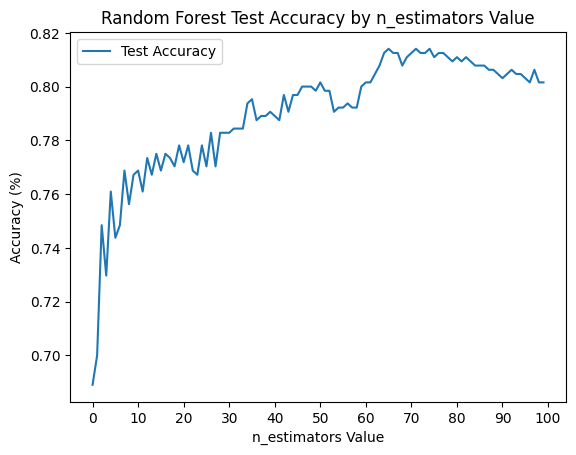

In [ ]:
test_accs = []

for n in range(1, 101):
  model = RandomForestClassifier(n_estimators=n, max_depth=12, random_state=0)
  train_acc, test_acc = check_accuracies(model, X_train, y_train, X_test, y_test)
  test_accs.append(test_acc)

print(f'Train Accuracy: {train_acc}, Test Accuracy: {test_acc}')
plt.title('Random Forest Test Accuracy by n_estimators Value')
plt.plot(test_accs, label='Test Accuracy')
plt.xlabel('n_estimators Value')
plt.ylabel('Accuracy (%)')
plt.xticks(range(0, 101, 10))

plt.legend()
plt.show()

**Section C**

Train Accuracy: 0.9989572471324296, Test Accuracy: 0.7875


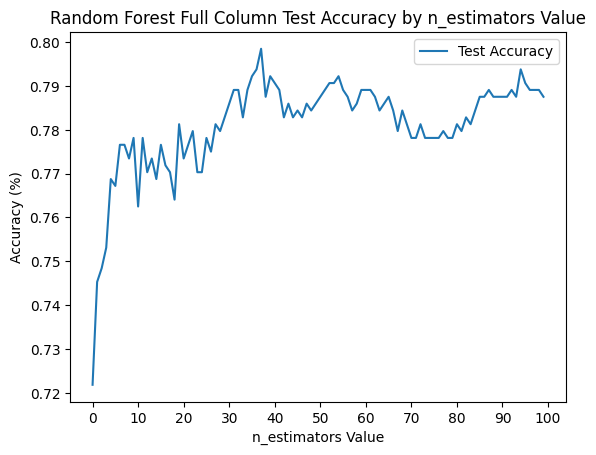

In [ ]:
test_accs = []
for n in range(1, 101):
  model = RandomForestClassifier(n_estimators=n, max_depth=12, random_state=0, max_features=None)
  _, test_acc = check_accuracies(model, X_train, y_train, X_test, y_test)
  test_accs.append(test_acc)

print(f'Train Accuracy: {train_acc}, Test Accuracy: {test_acc}')
plt.title('Random Forest Full Column Test Accuracy by n_estimators Value')
plt.plot(test_accs, label='Test Accuracy')
plt.xlabel('n_estimators Value')
plt.ylabel('Accuracy (%)')
plt.xticks(range(0, 101, 10))

plt.legend()
plt.show()

**Section D**

1. The model in C (Random Forest) performs better than the model in B (Decision Tree), reaching 80% accuracy compared to 72%. This is expected: a DecisionTree is prone to overfitting because it only learns a single path through the data, compared to Random Forest that aggregates the predictions of many decision trees (In this case 100), each trained on a different subset of the data.

2. By comparing the graphs, it seems that the model that uses all features performs worse than the model that uses a random subset of features. This can happen when some features are irrelevant or noisy - they add randomness without contributing meaningful information, which can confuse the model. By using only a random subset of features, the model is less likely to rely on those unhelpful features.

**Section E**

a. The first split seems better, because both subsets contain a mix of the two classes, preserving class diversity in each. This helps the model generalize better during training and evaluation and avoids overfitting.

b. Since we choose decision tree based on gain, we'll add it to our calculations.

Split 1:

$H_{\text{Entropy}} = -\frac14\log(\frac14)-\frac34\log(\frac34) = 0.5623$

$H_{\text{Gini}} = 1 - \frac14^2 - \frac34^2 = \frac38 = 0.375$

$H_{\text{M.Error}} = 1 -\frac34 = 0.25$

All these Impurity measurements are identical across both regions, and therefore they are this split's gain as well.

$G_{\text{Entropy}} = 0.5623$

$G_{\text{Gini}} = 0.375$

$G_{\text{M.Error}} = 0.25$

Split 2:

Left Hand Subset:

$H_{\text{Entropy}} = -(\frac13\log(\frac13) + \frac23\log(\frac23)) = 0.6365$

$H_{\text{Gini}} = 1 - \frac13^2 - \frac23^2 = \frac49 = 0.4444$

$H_{\text{M.Error}} = 1 - \frac23 = \frac13 = 0.3333$

This time, these are not identical across both regions.

Right Hand Subset:

$H_{\text{Entropy}} = -1 \log 1 - 0 \log 0 = 0 + 0 \cdot \infty = 0\cdot \infty$

We'll define this as 0.

$H_{\text{Gini}} = 1 - 1^2 - 0^2 = 0$

$H_{\text{M.Error}} = 1 - 1 = 0$

Giving gains:

$G_{\text{Entropy}} = \frac34 \cdot 0.6365 + \frac14\cdot 0 = 0.4773$

$G_{\text{Gini}} = \frac34 \cdot \frac49 + \frac14 \cdot 0 = \frac13 = 0.3333$

$G_{\text{M.Error}} = \frac34 \cdot \frac13 + \frac14 \cdot 0 = \frac14 = 0.25$

While the misclassification error rate happens to be equal across both splits, it does not capture the class diversity issue we've described in section A. Therefore, it is out suggestion that we disregard misclassification error as a measurement for our decision tree building, and we rely on the other measures.

# **Question 3**

**Section A**

We can use the K-Means algorithm to estimate the optimal clustering into 100 groups. We will treat the pictures as the data points $x_1, x_2, \dots, x_{m}$
and their users as the clusters $C_1, C_2, \dots, C_{100}$.

###Algorithm:

**1. Inialization**

  First, We randomly choose 100 centroids $\mu_1, \mu_2, \dots, \mu_{100}$.

**2. Iterations**

   Repeat until convergence:

   (i) Cluster Assignment Step (assign each observation to the closest cluster):

   compute,
    $$
    \forall i \in [m], \quad C(i) = \arg\min_{j \in [100]} \|x_i - \mu_j\|
    $$   
   
   (ii) Centroid Update Step (update each cluster’s centroid to be the mean of its assigned points):
  $$
  \mu_j = \frac{1}{|C_j|}\sum_{x\in C_j}{x}
  $$


  ### Remarks:

- The algorithm is guaranteed to converge (since the value of the objective function—which is the weighted average of the within-cluster variances—can only decrease up to a certain limit).


- The algorithm performs **iterative updates** of cluster assignments and centroids until convergence to a **local minimum**.

- It reduces the **within-cluster variance**, i.e., the total squared distance between each point and its cluster centroid.

- The process is repeated until the assignments no longer change (or until a predefined threshold).

In this method, we perform an iterative update of the partitioning and the cluster centroids.
Each observation is assigned to only one cluster—specifically, the one whose centroid is closest to it.
The centroids are then updated by computing the mean of the points assigned to each cluster.









**Section B**

The property states that the distance between two images of the same user is not greater than the distance between two images of different users.
So in effect, we now have a metric that better fits our data, and so we can update step (i) of the algotithm by using this metric
$d(\cdot,\cdot)$  instead of the standard Euclidean norm:
$\forall i \in [m], \quad C(i) = \arg\min_{j \in [100]} \|x_i - \mu_j\|$
    

**Section C**

Let's denote $\lambda_j = P(z_i = j)$

Therefore, the unknown parameters are:

$$
\theta := (\sigma_1^2, \sigma_2^2, \lambda_1, \ldots, \lambda_{100})
$$



The propability of a Single Observation is:

$$
P_\theta(x_i) = \sum_{j=1}^{100} P_\theta(x_i, z_i = j)
= \sum_{j=1}^{100} P_\theta(z_i = j) \cdot P_\theta(x_i \mid z_i = j)
$$

$$
= \sum_{j=1}^{2} \frac{\lambda_j}{\sqrt{2\pi\sigma_j^2}} \cdot e^{-\frac{(x_i - j)^2}{2\sigma_j^2}}
+ \sum_{j=3}^{100} \frac{\lambda_j}{j} \cdot e^{-\frac{x_i}{j}} \cdot \mathbf{1}\{x_i \geq 0\}
$$

Therfore the likelihood of All Observatios is:

$$
L(\theta) = \prod_{i=1}^{m} P_\theta(x_i)
$$

Then, Log-Likelihood of All Observations:

$$
\ell(\theta) = \log(L(\theta)) = \sum_{i=1}^{m} \log P_\theta(x_i)
$$

We get that:

$$
\ell(\theta) = \sum_{i=1}^{m} \log \left(
\sum_{j=1}^{2} \frac{\lambda_j}{\sqrt{2\pi\sigma_j^2}} \cdot e^{-\frac{(x_i - j)^2}{2\sigma_j^2}}
+ \sum_{j=3}^{100} \frac{\lambda_j}{j} \cdot e^{-\frac{x_i}{j}} \cdot \mathbf{1}\{x_i \geq 0\}
\right)
$$


**Section D**

##EM algorithm

**1. Inialization**
     
We initialize the parameters $\theta$ arbitrarily but legal.  
For example, let:

$$
\lambda_1 = \ldots = \lambda_{100} = \frac{1}{100}, \quad \sigma_1^2 = \sigma_2^2 = 1
$$

**2. Iterations**  

  for all $t\geq0$ repeat until convergence:

   - **E Step** :

   Compute the posterior probabilities of each observation belonging to each cluster,

$$
\forall i \in [m],\; j \in [100]: \quad q_{ij}^{(t)} = P_{\theta^{(t)}}(z_i = j \mid x_i) = \frac{P_{\theta^{(t)}}(x_i, z_i = j)}{P_{\theta^{(t)}}(x_i)}
$$

  Where:

$$
P_{\theta^{(t)}}(x_i, z_i = j) =
\begin{cases}
\frac{\lambda_j^{(t)}}{\sqrt{2\pi{\sigma_j^2}^{(t)}}} \cdot e^{-\frac{(x_i - j)^2}{2{\sigma_j^2}^{(t)}}}, & j \in \{1, 2\} \\\\[1em]
\frac{\lambda_j^{(t)}}{j} \cdot e^{-\frac{x_i}{j}} \cdot \mathbf{1}\{x_i \ge 0\}, & j \in \{3, \ldots, 100\}
\end{cases}
$$

And the denominator is:

$$
P_{\theta^{(t)}}(x_i) = \sum_{k=1}^{2} \frac{\lambda_k^{(t)}}{\sqrt{2\pi{\sigma_k^2}^{(t)}}} \cdot e^{-\frac{(x_i - k)^2}{2{\sigma_k^2}^{(t)}}}
+ \sum_{k=3}^{100} \frac{\lambda_k^{(t)}}{k} \cdot e^{-\frac{x_i}{k}} \cdot \mathbf{1}\{x_i \ge 0\}
$$

- **M step** :

Maximize the expected complete-data log-likelihood (with $\quad q_{ij}$ found before in E step) :

$$
\theta^{(t+1)} \leftarrow \arg\max_\theta \sum_{i=1}^{m} \sum_{j=1}^{100} q_{ij}^{(t)} \log \left(P_\theta(x_i, z_i = j)\right)
$$

With some algebra, this leads to the following updates:

$$
\forall j \in [100]: \quad \lambda_j^{(t+1)} \leftarrow \frac{1}{m} \sum_{i=1}^{m} q_{ij}^{(t)}
$$

$$
\forall j \in \{1, 2\}: \quad {\sigma_j^2}^{(t+1)} \leftarrow \frac{\sum_{i=1}^{m} q_{ij}^{(t)} \cdot (x_i - j)^2}{\sum_{i=1}^{m} q_{ij}^{(t)}}
$$
   

**Section E**

Let's denote $Y$ as the total number of pictures in every day.

Now, we know from the given that: $\lambda_j = \frac{j}{Y}$

Let's compute $Y$:
$$
Y = \sum_{j=1}^{100} j = \frac{100(100 + 1)}{2} = 5050
$$

Therefore we get:
 $$
 \forall j \in [100], \quad \lambda_j = \frac{j}{5050}
 $$

Because $\lambda_j$ is contant while $q_{ij}$ is updated, only the E step will change.

Note: The update of $\sigma_j^2$ (M step) will remain the same.


**Section F**

Assume the following model holds:

$$
x_i \mid z_i = j \sim \mathcal{N}(\mu_j, 1), \quad \lambda_j = \frac{1}{100}
$$

Then for all $i \in [m]$, we have:

$$
C(i) = \arg\min_j \|x_i - \mu_j\|
= \arg\max_j -\frac{1}{2} \|x_i - \mu_j\|^2
= \arg\max_j e^{-\frac{1}{2} \|x_i - \mu_j\|^2}
= \arg\max_j \frac{1}{100\sqrt{2\pi}} e^{-\frac{1}{2} \|x_i - \mu_j\|^2}
$$

$$
= \arg\max_j \frac{\lambda_j}{\sqrt{2\pi}} e^{-\frac{1}{2} \|x_i - \mu_j\|^2}
= \arg\max_j P_\theta(x_i, z_i = j)
= \arg\max_j \frac{P_\theta(x_i, z_i = j)}{P_\theta(x_i)}
= \arg\max_j P_\theta(z_i = j \mid x_i)
= \arg\max_j q_{ij}
$$


In other words, under the assumption of equal priors, the K-Means algorithm performs a **"hard" assignment** of each point to the cluster whose center is closest to it.  
This is in contrast to the EM algorithm, which performs a **"soft" assignment** (i.e., probabilistic) of each point to each cluster, allowing a more flexible and expressive assignment.

Therefore:

- In K-Means, the cluster centers will be the **mean of the points** assigned to them (even though this is not guaranteed to be optimal).
- In EM, the update of the cluster centers is weighted by the responsibility $q_{ij}$ of each point, i.e., points contribute proportionally to how likely they belong to each cluster.

This allows the EM algorithm to better model soft assignments and often reach a more expressive clustering result.
